In [20]:
!pip install 'sagemaker[local]' --upgrade

In [21]:
!sudo service docker restart

Stopping docker: [  OK  ]
Starting docker:	.[  OK  ]


In [22]:
!docker rmi -f $(docker images -a -q)

Untagged: 683313688378.dkr.ecr.us-east-1.amazonaws.com/sagemaker-scikit-learn:0.20.0-cpu-py3
Untagged: 683313688378.dkr.ecr.us-east-1.amazonaws.com/sagemaker-scikit-learn@sha256:0924c8fff44441d5dab74fc8ff7c5ecbc94af2215a4581e3302f850275bb900b
Deleted: sha256:6c10beb91746cc637cf24fb1dc9b98361da8dd8b31b4de409ffffee369611317


In [23]:
s3_bucket = 'sagemaker-cookbook-bucket'
prefix = 'chapter03'

In [24]:
train_s3 = \
f"s3://{s3_bucket}/{prefix}/synthetic/training_data.csv" 

In [25]:
from sagemaker.inputs import TrainingInput
    
train_input = TrainingInput(train_s3, content_type="text/csv")

In [26]:
import os
import sagemaker
from sagemaker import get_execution_role
from sagemaker.local import LocalSession

sagemaker_session = LocalSession()
sagemaker_session.config = {'local': {'local_code': True}}

role = get_execution_role()

In [27]:
from sagemaker.sklearn.estimator import SKLearn

estimator = SKLearn(entry_point='sklearn_script.py',
                    session=sagemaker_session,
                    role=role,
                    instance_type='local',
                    instance_count=1,
                    py_version='py3',
                    framework_version='0.20.0')

In [28]:
estimator.fit({'train': train_input})

Creating mstwddw8st-algo-1-qriko ... 
Creating mstwddw8st-algo-1-qriko ... done
Attaching to mstwddw8st-algo-1-qriko
mstwddw8st-algo-1-qriko | 2021-04-09 17:22:16,747 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
mstwddw8st-algo-1-qriko | 2021-04-09 17:22:16,750 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
mstwddw8st-algo-1-qriko | 2021-04-09 17:22:16,762 sagemaker_sklearn_container.training INFO     Invoking user training script.
mstwddw8st-algo-1-qriko | 2021-04-09 17:22:16,924 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
mstwddw8st-algo-1-qriko | 2021-04-09 17:22:16,939 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
mstwddw8st-algo-1-qriko | 2021-04-09 17:22:16,953 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
mstwddw8st-algo-1-qriko | 2021-04-09 17:22:16,965 sagemaker-training-toolkit INFO     In

mstwddw8st-algo-1-qriko | Iteration 34, loss = 224710.59855507
mstwddw8st-algo-1-qriko | Validation score: 0.867818
mstwddw8st-algo-1-qriko | Iteration 35, loss = 224725.88906556
mstwddw8st-algo-1-qriko | Validation score: 0.867934
mstwddw8st-algo-1-qriko | Iteration 36, loss = 224686.62844859
mstwddw8st-algo-1-qriko | Validation score: 0.867706
mstwddw8st-algo-1-qriko | Iteration 37, loss = 224780.61155608
mstwddw8st-algo-1-qriko | Validation score: 0.867432
mstwddw8st-algo-1-qriko | Iteration 38, loss = 224732.30440636
mstwddw8st-algo-1-qriko | Validation score: 0.867742
mstwddw8st-algo-1-qriko | Iteration 39, loss = 224695.01369646
mstwddw8st-algo-1-qriko | Validation score: 0.867737
mstwddw8st-algo-1-qriko | Iteration 40, loss = 224660.89081480
mstwddw8st-algo-1-qriko | Validation score: 0.867639
mstwddw8st-algo-1-qriko | Iteration 41, loss = 224655.76108527
mstwddw8st-algo-1-qriko | Validation score: 0.867689
mstwddw8st-algo-1-qriko | Iteration 42, loss = 224658.14349532
mstwddw8s

mstwddw8st-algo-1-qriko | Iteration 101, loss = 224243.56164348
mstwddw8st-algo-1-qriko | Validation score: 0.868287
mstwddw8st-algo-1-qriko | Iteration 102, loss = 224429.64444330
mstwddw8st-algo-1-qriko | Validation score: 0.868686
mstwddw8st-algo-1-qriko | Iteration 103, loss = 224381.49217496
mstwddw8st-algo-1-qriko | Validation score: 0.868192
mstwddw8st-algo-1-qriko | Iteration 104, loss = 224343.40268298
mstwddw8st-algo-1-qriko | Validation score: 0.867834
mstwddw8st-algo-1-qriko | Iteration 105, loss = 224242.53287906
mstwddw8st-algo-1-qriko | Validation score: 0.868210
mstwddw8st-algo-1-qriko | Iteration 106, loss = 224236.70897626
mstwddw8st-algo-1-qriko | Validation score: 0.868221
mstwddw8st-algo-1-qriko | Iteration 107, loss = 224234.43596514
mstwddw8st-algo-1-qriko | Validation score: 0.868179
mstwddw8st-algo-1-qriko | Iteration 108, loss = 224201.56340800
mstwddw8st-algo-1-qriko | Validation score: 0.868332
mstwddw8st-algo-1-qriko | Iteration 109, loss = 224182.41574424


mstwddw8st-algo-1-qriko | Iteration 169, loss = 223589.42578885
mstwddw8st-algo-1-qriko | Validation score: 0.868592
mstwddw8st-algo-1-qriko | Iteration 170, loss = 223659.92014126
mstwddw8st-algo-1-qriko | Validation score: 0.868370
mstwddw8st-algo-1-qriko | Iteration 171, loss = 223666.20154205
mstwddw8st-algo-1-qriko | Validation score: 0.869062
mstwddw8st-algo-1-qriko | Iteration 172, loss = 223667.31895144
mstwddw8st-algo-1-qriko | Validation score: 0.869166
mstwddw8st-algo-1-qriko | Iteration 173, loss = 223737.04763266
mstwddw8st-algo-1-qriko | Validation score: 0.869046
mstwddw8st-algo-1-qriko | Iteration 174, loss = 223498.11062243
mstwddw8st-algo-1-qriko | Validation score: 0.868458
mstwddw8st-algo-1-qriko | Iteration 175, loss = 223519.43918392
mstwddw8st-algo-1-qriko | Validation score: 0.867996
mstwddw8st-algo-1-qriko | Iteration 176, loss = 223587.00969032
mstwddw8st-algo-1-qriko | Validation score: 0.867993
mstwddw8st-algo-1-qriko | Iteration 177, loss = 223505.61304934


mstwddw8st-algo-1-qriko | Iteration 238, loss = 222442.08304115
mstwddw8st-algo-1-qriko | Validation score: 0.868205
mstwddw8st-algo-1-qriko | Iteration 239, loss = 222422.10646887
mstwddw8st-algo-1-qriko | Validation score: 0.869322
mstwddw8st-algo-1-qriko | Iteration 240, loss = 222381.61884514
mstwddw8st-algo-1-qriko | Validation score: 0.869261
mstwddw8st-algo-1-qriko | Iteration 241, loss = 222680.32067976
mstwddw8st-algo-1-qriko | Validation score: 0.870522
mstwddw8st-algo-1-qriko | Iteration 242, loss = 222381.78134227
mstwddw8st-algo-1-qriko | Validation score: 0.870065
mstwddw8st-algo-1-qriko | Iteration 243, loss = 222480.49433678
mstwddw8st-algo-1-qriko | Validation score: 0.869116
mstwddw8st-algo-1-qriko | Iteration 244, loss = 222202.29541623
mstwddw8st-algo-1-qriko | Validation score: 0.869894
mstwddw8st-algo-1-qriko | Iteration 245, loss = 222378.21708434
mstwddw8st-algo-1-qriko | Validation score: 0.870099
mstwddw8st-algo-1-qriko | Iteration 246, loss = 222201.49935232


mstwddw8st-algo-1-qriko | Iteration 307, loss = 219787.48112170
mstwddw8st-algo-1-qriko | Validation score: 0.870042
mstwddw8st-algo-1-qriko | Iteration 308, loss = 219568.49581980
mstwddw8st-algo-1-qriko | Validation score: 0.870829
mstwddw8st-algo-1-qriko | Iteration 309, loss = 219711.04464936
mstwddw8st-algo-1-qriko | Validation score: 0.873534
mstwddw8st-algo-1-qriko | Iteration 310, loss = 220103.64622023
mstwddw8st-algo-1-qriko | Validation score: 0.872138
mstwddw8st-algo-1-qriko | Iteration 311, loss = 220758.86153146
mstwddw8st-algo-1-qriko | Validation score: 0.868973
mstwddw8st-algo-1-qriko | Iteration 312, loss = 219431.64142883
mstwddw8st-algo-1-qriko | Validation score: 0.871930
mstwddw8st-algo-1-qriko | Iteration 313, loss = 219082.99055291
mstwddw8st-algo-1-qriko | Validation score: 0.871920
mstwddw8st-algo-1-qriko | Iteration 314, loss = 219330.88638893
mstwddw8st-algo-1-qriko | Validation score: 0.872398
mstwddw8st-algo-1-qriko | Iteration 315, loss = 218816.51970181


mstwddw8st-algo-1-qriko | Iteration 376, loss = 212287.66873389
mstwddw8st-algo-1-qriko | Validation score: 0.877293
mstwddw8st-algo-1-qriko | Iteration 377, loss = 212566.41637453
mstwddw8st-algo-1-qriko | Validation score: 0.877534
mstwddw8st-algo-1-qriko | Iteration 378, loss = 213834.06862295
mstwddw8st-algo-1-qriko | Validation score: 0.876406
mstwddw8st-algo-1-qriko | Iteration 379, loss = 215808.97332110
mstwddw8st-algo-1-qriko | Validation score: 0.870674
mstwddw8st-algo-1-qriko | Iteration 380, loss = 216258.72916657
mstwddw8st-algo-1-qriko | Validation score: 0.880048
mstwddw8st-algo-1-qriko | Iteration 381, loss = 211888.32865575
mstwddw8st-algo-1-qriko | Validation score: 0.875177
mstwddw8st-algo-1-qriko | Iteration 382, loss = 210915.65564619
mstwddw8st-algo-1-qriko | Validation score: 0.871343
mstwddw8st-algo-1-qriko | Iteration 383, loss = 212668.94364067
mstwddw8st-algo-1-qriko | Validation score: 0.875141
mstwddw8st-algo-1-qriko | Iteration 384, loss = 211937.51133692


mstwddw8st-algo-1-qriko | Iteration 445, loss = 198479.58152083
mstwddw8st-algo-1-qriko | Validation score: 0.885852
mstwddw8st-algo-1-qriko | Iteration 446, loss = 196846.18409950
mstwddw8st-algo-1-qriko | Validation score: 0.889213
mstwddw8st-algo-1-qriko | Iteration 447, loss = 196163.68976030
mstwddw8st-algo-1-qriko | Validation score: 0.885929
mstwddw8st-algo-1-qriko | Iteration 448, loss = 193052.44668674
mstwddw8st-algo-1-qriko | Validation score: 0.885706
mstwddw8st-algo-1-qriko | Iteration 449, loss = 193384.65815003
mstwddw8st-algo-1-qriko | Validation score: 0.888326
mstwddw8st-algo-1-qriko | Iteration 450, loss = 192877.05413165
mstwddw8st-algo-1-qriko | Validation score: 0.885303
mstwddw8st-algo-1-qriko | Iteration 451, loss = 192075.68953764
mstwddw8st-algo-1-qriko | Validation score: 0.892169
mstwddw8st-algo-1-qriko | Iteration 452, loss = 194667.44456339
mstwddw8st-algo-1-qriko | Validation score: 0.890276
mstwddw8st-algo-1-qriko | Iteration 453, loss = 193847.59052116


mstwddw8st-algo-1-qriko | Validation score: 0.884831
mstwddw8st-algo-1-qriko | Iteration 513, loss = 168053.85306665
mstwddw8st-algo-1-qriko | Validation score: 0.916491
mstwddw8st-algo-1-qriko | Iteration 514, loss = 171136.98168245
mstwddw8st-algo-1-qriko | Validation score: 0.887890
mstwddw8st-algo-1-qriko | Iteration 515, loss = 157853.25112946
mstwddw8st-algo-1-qriko | Validation score: 0.918023
mstwddw8st-algo-1-qriko | Iteration 516, loss = 155196.97992106
mstwddw8st-algo-1-qriko | Validation score: 0.906097
mstwddw8st-algo-1-qriko | Iteration 517, loss = 153580.21787963
mstwddw8st-algo-1-qriko | Validation score: 0.915943
mstwddw8st-algo-1-qriko | Iteration 518, loss = 149372.83409153
mstwddw8st-algo-1-qriko | Validation score: 0.908804
mstwddw8st-algo-1-qriko | Iteration 519, loss = 149977.21015120
mstwddw8st-algo-1-qriko | Validation score: 0.917724
mstwddw8st-algo-1-qriko | Iteration 520, loss = 149734.97366870
mstwddw8st-algo-1-qriko | Validation score: 0.911277
mstwddw8st-

mstwddw8st-algo-1-qriko | Iteration 580, loss = 98399.01869277
mstwddw8st-algo-1-qriko | Validation score: 0.947991
mstwddw8st-algo-1-qriko | Iteration 581, loss = 103473.06275360
mstwddw8st-algo-1-qriko | Validation score: 0.930257
mstwddw8st-algo-1-qriko | Iteration 582, loss = 106921.90932721
mstwddw8st-algo-1-qriko | Validation score: 0.944078
mstwddw8st-algo-1-qriko | Iteration 583, loss = 97296.42023581
mstwddw8st-algo-1-qriko | Validation score: 0.945478
mstwddw8st-algo-1-qriko | Iteration 584, loss = 98073.49603476
mstwddw8st-algo-1-qriko | Validation score: 0.926450
mstwddw8st-algo-1-qriko | Iteration 585, loss = 103219.57366974
mstwddw8st-algo-1-qriko | Validation score: 0.948957
mstwddw8st-algo-1-qriko | Iteration 586, loss = 105023.80433369
mstwddw8st-algo-1-qriko | Validation score: 0.945971
mstwddw8st-algo-1-qriko | Iteration 587, loss = 109264.23701880
mstwddw8st-algo-1-qriko | Validation score: 0.921696
mstwddw8st-algo-1-qriko | Iteration 588, loss = 111947.89619636
mst

mstwddw8st-algo-1-qriko | Iteration 649, loss = 51346.00256153
mstwddw8st-algo-1-qriko | Validation score: 0.966755
mstwddw8st-algo-1-qriko | Iteration 650, loss = 51559.09019158
mstwddw8st-algo-1-qriko | Validation score: 0.975142
mstwddw8st-algo-1-qriko | Iteration 651, loss = 49926.28170530
mstwddw8st-algo-1-qriko | Validation score: 0.975760
mstwddw8st-algo-1-qriko | Iteration 652, loss = 47606.35733452
mstwddw8st-algo-1-qriko | Validation score: 0.971167
mstwddw8st-algo-1-qriko | Iteration 653, loss = 63454.39853948
mstwddw8st-algo-1-qriko | Validation score: 0.962417
mstwddw8st-algo-1-qriko | Iteration 654, loss = 78697.32474523
mstwddw8st-algo-1-qriko | Validation score: 0.971181
mstwddw8st-algo-1-qriko | Iteration 655, loss = 65692.73833979
mstwddw8st-algo-1-qriko | Validation score: 0.976984
mstwddw8st-algo-1-qriko | Iteration 656, loss = 53481.05868807
mstwddw8st-algo-1-qriko | Validation score: 0.974819
mstwddw8st-algo-1-qriko | Iteration 657, loss = 58282.08100575
mstwddw8s

mstwddw8st-algo-1-qriko | Iteration 718, loss = 24008.79171957
mstwddw8st-algo-1-qriko | Validation score: 0.987379
mstwddw8st-algo-1-qriko | Iteration 719, loss = 23329.01265238
mstwddw8st-algo-1-qriko | Validation score: 0.988476
mstwddw8st-algo-1-qriko | Iteration 720, loss = 21987.02473991
mstwddw8st-algo-1-qriko | Validation score: 0.987200
mstwddw8st-algo-1-qriko | Iteration 721, loss = 24300.03543337
mstwddw8st-algo-1-qriko | Validation score: 0.989528
mstwddw8st-algo-1-qriko | Iteration 722, loss = 23524.13269358
mstwddw8st-algo-1-qriko | Validation score: 0.989501
mstwddw8st-algo-1-qriko | Iteration 723, loss = 24185.65639412
mstwddw8st-algo-1-qriko | Validation score: 0.987041
mstwddw8st-algo-1-qriko | Iteration 724, loss = 25347.61449565
mstwddw8st-algo-1-qriko | Validation score: 0.984760
mstwddw8st-algo-1-qriko | Iteration 725, loss = 29780.48151078
mstwddw8st-algo-1-qriko | Validation score: 0.987536
mstwddw8st-algo-1-qriko | Iteration 726, loss = 29884.45901366
mstwddw8s

mstwddw8st-algo-1-qriko | Iteration 787, loss = 16945.35428930
mstwddw8st-algo-1-qriko | Validation score: 0.991993
mstwddw8st-algo-1-qriko | Iteration 788, loss = 16847.18004675
mstwddw8st-algo-1-qriko | Validation score: 0.988128
mstwddw8st-algo-1-qriko | Iteration 789, loss = 21022.78835991
mstwddw8st-algo-1-qriko | Validation score: 0.988352
mstwddw8st-algo-1-qriko | Iteration 790, loss = 20123.20561516
mstwddw8st-algo-1-qriko | Validation score: 0.992821
mstwddw8st-algo-1-qriko | Iteration 791, loss = 17748.39243595
mstwddw8st-algo-1-qriko | Validation score: 0.992431
mstwddw8st-algo-1-qriko | Iteration 792, loss = 17710.90349924
mstwddw8st-algo-1-qriko | Validation score: 0.992272
mstwddw8st-algo-1-qriko | Iteration 793, loss = 18923.28133987
mstwddw8st-algo-1-qriko | Validation score: 0.991074
mstwddw8st-algo-1-qriko | Iteration 794, loss = 19038.96812218
mstwddw8st-algo-1-qriko | Validation score: 0.983278
mstwddw8st-algo-1-qriko | Iteration 795, loss = 21172.26055003
mstwddw8s

mstwddw8st-algo-1-qriko | Validation score: 0.993510
mstwddw8st-algo-1-qriko | Iteration 856, loss = 17576.55578064
mstwddw8st-algo-1-qriko | Validation score: 0.993522
mstwddw8st-algo-1-qriko | Iteration 857, loss = 17143.77625894
mstwddw8st-algo-1-qriko | Validation score: 0.991382
mstwddw8st-algo-1-qriko | Iteration 858, loss = 16453.20286810
mstwddw8st-algo-1-qriko | Validation score: 0.992515
mstwddw8st-algo-1-qriko | Iteration 859, loss = 14615.89689021
mstwddw8st-algo-1-qriko | Validation score: 0.993245
mstwddw8st-algo-1-qriko | Iteration 860, loss = 14265.63519881
mstwddw8st-algo-1-qriko | Validation score: 0.993774
mstwddw8st-algo-1-qriko | Iteration 861, loss = 14842.85388767
mstwddw8st-algo-1-qriko | Validation score: 0.991526
mstwddw8st-algo-1-qriko | Iteration 862, loss = 15608.81434329
mstwddw8st-algo-1-qriko | Validation score: 0.992842
mstwddw8st-algo-1-qriko | Iteration 863, loss = 15638.71090523
mstwddw8st-algo-1-qriko | Validation score: 0.993601
mstwddw8st-algo-1-q

mstwddw8st-algo-1-qriko | Iteration 923, loss = 19021.51421947
mstwddw8st-algo-1-qriko | Validation score: 0.989496
mstwddw8st-algo-1-qriko | Iteration 924, loss = 22118.59228733
mstwddw8st-algo-1-qriko | Validation score: 0.983354
mstwddw8st-algo-1-qriko | Iteration 925, loss = 21344.31248063
mstwddw8st-algo-1-qriko | Validation score: 0.991086
mstwddw8st-algo-1-qriko | Iteration 926, loss = 16566.21134762
mstwddw8st-algo-1-qriko | Validation score: 0.993604
mstwddw8st-algo-1-qriko | Iteration 927, loss = 16887.57627090
mstwddw8st-algo-1-qriko | Validation score: 0.993603
mstwddw8st-algo-1-qriko | Iteration 928, loss = 17129.90727818
mstwddw8st-algo-1-qriko | Validation score: 0.992388
mstwddw8st-algo-1-qriko | Iteration 929, loss = 18131.95750261
mstwddw8st-algo-1-qriko | Validation score: 0.992236
mstwddw8st-algo-1-qriko | Iteration 930, loss = 15795.31421305
mstwddw8st-algo-1-qriko | Validation score: 0.993605
mstwddw8st-algo-1-qriko | Iteration 931, loss = 14286.33160694
mstwddw8s

mstwddw8st-algo-1-qriko | Iteration 991, loss = 14341.82759861
mstwddw8st-algo-1-qriko | Validation score: 0.993303
mstwddw8st-algo-1-qriko | Iteration 992, loss = 14756.86942982
mstwddw8st-algo-1-qriko | Validation score: 0.993815
mstwddw8st-algo-1-qriko | Iteration 993, loss = 14685.82991216
mstwddw8st-algo-1-qriko | Validation score: 0.992787
mstwddw8st-algo-1-qriko | Iteration 994, loss = 16088.55782660
mstwddw8st-algo-1-qriko | Validation score: 0.993863
mstwddw8st-algo-1-qriko | Iteration 995, loss = 14349.31378754
mstwddw8st-algo-1-qriko | Validation score: 0.992968
mstwddw8st-algo-1-qriko | Iteration 996, loss = 14380.66498513
mstwddw8st-algo-1-qriko | Validation score: 0.993818
mstwddw8st-algo-1-qriko | Iteration 997, loss = 14339.86410120
mstwddw8st-algo-1-qriko | Validation score: 0.993915
mstwddw8st-algo-1-qriko | Iteration 998, loss = 14281.73320622
mstwddw8st-algo-1-qriko | Validation score: 0.992654
mstwddw8st-algo-1-qriko | Iteration 999, loss = 15828.72126299
mstwddw8s

mstwddw8st-algo-1-qriko | Iteration 1059, loss = 14712.38477964
mstwddw8st-algo-1-qriko | Validation score: 0.993280
mstwddw8st-algo-1-qriko | Iteration 1060, loss = 13804.10258342
mstwddw8st-algo-1-qriko | Validation score: 0.993785
mstwddw8st-algo-1-qriko | Iteration 1061, loss = 14367.82694927
mstwddw8st-algo-1-qriko | Validation score: 0.993383
mstwddw8st-algo-1-qriko | Iteration 1062, loss = 13934.32300341
mstwddw8st-algo-1-qriko | Validation score: 0.993462
mstwddw8st-algo-1-qriko | Iteration 1063, loss = 14576.90880373
mstwddw8st-algo-1-qriko | Validation score: 0.993475
mstwddw8st-algo-1-qriko | Iteration 1064, loss = 14210.48455983
mstwddw8st-algo-1-qriko | Validation score: 0.993842
mstwddw8st-algo-1-qriko | Iteration 1065, loss = 14860.47792533
mstwddw8st-algo-1-qriko | Validation score: 0.993195
mstwddw8st-algo-1-qriko | Iteration 1066, loss = 14290.82538039
mstwddw8st-algo-1-qriko | Validation score: 0.992480
mstwddw8st-algo-1-qriko | Iteration 1067, loss = 14883.48015407


mstwddw8st-algo-1-qriko | Iteration 1127, loss = 17257.83983191
mstwddw8st-algo-1-qriko | Validation score: 0.993516
mstwddw8st-algo-1-qriko | Iteration 1128, loss = 14525.28400281
mstwddw8st-algo-1-qriko | Validation score: 0.993478
mstwddw8st-algo-1-qriko | Iteration 1129, loss = 15018.54140921
mstwddw8st-algo-1-qriko | Validation score: 0.993168
mstwddw8st-algo-1-qriko | Iteration 1130, loss = 17524.59332303
mstwddw8st-algo-1-qriko | Validation score: 0.993936
mstwddw8st-algo-1-qriko | Iteration 1131, loss = 15879.49191135
mstwddw8st-algo-1-qriko | Validation score: 0.991015
mstwddw8st-algo-1-qriko | Iteration 1132, loss = 15680.96224455
mstwddw8st-algo-1-qriko | Validation score: 0.993953
mstwddw8st-algo-1-qriko | Iteration 1133, loss = 14398.05801676
mstwddw8st-algo-1-qriko | Validation score: 0.993849
mstwddw8st-algo-1-qriko | Iteration 1134, loss = 14176.36617385
mstwddw8st-algo-1-qriko | Validation score: 0.993035
mstwddw8st-algo-1-qriko | Iteration 1135, loss = 14492.73458144


mstwddw8st-algo-1-qriko | Iteration 1195, loss = 13952.53040193
mstwddw8st-algo-1-qriko | Validation score: 0.992801
mstwddw8st-algo-1-qriko | Iteration 1196, loss = 13990.46528963
mstwddw8st-algo-1-qriko | Validation score: 0.993286
mstwddw8st-algo-1-qriko | Iteration 1197, loss = 14529.95234620
mstwddw8st-algo-1-qriko | Validation score: 0.993091
mstwddw8st-algo-1-qriko | Iteration 1198, loss = 14578.48705170
mstwddw8st-algo-1-qriko | Validation score: 0.993921
mstwddw8st-algo-1-qriko | Iteration 1199, loss = 13624.49449971
mstwddw8st-algo-1-qriko | Validation score: 0.993930
mstwddw8st-algo-1-qriko | Iteration 1200, loss = 13731.51262182
mstwddw8st-algo-1-qriko | Validation score: 0.992996
mstwddw8st-algo-1-qriko | Iteration 1201, loss = 14859.22693724
mstwddw8st-algo-1-qriko | Validation score: 0.993991
mstwddw8st-algo-1-qriko | Iteration 1202, loss = 15572.24309723
mstwddw8st-algo-1-qriko | Validation score: 0.993375
mstwddw8st-algo-1-qriko | Iteration 1203, loss = 18633.06755483


mstwddw8st-algo-1-qriko | Iteration 1263, loss = 14643.59286581
mstwddw8st-algo-1-qriko | Validation score: 0.993456
mstwddw8st-algo-1-qriko | Iteration 1264, loss = 13471.43789682
mstwddw8st-algo-1-qriko | Validation score: 0.993332
mstwddw8st-algo-1-qriko | Iteration 1265, loss = 14012.99750699
mstwddw8st-algo-1-qriko | Validation score: 0.992526
mstwddw8st-algo-1-qriko | Iteration 1266, loss = 14222.78507105
mstwddw8st-algo-1-qriko | Validation score: 0.993990
mstwddw8st-algo-1-qriko | Iteration 1267, loss = 14429.72694327
mstwddw8st-algo-1-qriko | Validation score: 0.993580
mstwddw8st-algo-1-qriko | Iteration 1268, loss = 15340.92015112
mstwddw8st-algo-1-qriko | Validation score: 0.994026
mstwddw8st-algo-1-qriko | Iteration 1269, loss = 13904.97568514
mstwddw8st-algo-1-qriko | Validation score: 0.993718
mstwddw8st-algo-1-qriko | Iteration 1270, loss = 14403.62649051
mstwddw8st-algo-1-qriko | Validation score: 0.993952
mstwddw8st-algo-1-qriko | Iteration 1271, loss = 13578.51575738


mstwddw8st-algo-1-qriko | Iteration 1331, loss = 14673.05541549
mstwddw8st-algo-1-qriko | Validation score: 0.993068
mstwddw8st-algo-1-qriko | Iteration 1332, loss = 13493.87842237
mstwddw8st-algo-1-qriko | Validation score: 0.993404
mstwddw8st-algo-1-qriko | Iteration 1333, loss = 14043.67145844
mstwddw8st-algo-1-qriko | Validation score: 0.993708
mstwddw8st-algo-1-qriko | Iteration 1334, loss = 14090.08576490
mstwddw8st-algo-1-qriko | Validation score: 0.993842
mstwddw8st-algo-1-qriko | Iteration 1335, loss = 14124.42198218
mstwddw8st-algo-1-qriko | Validation score: 0.993990
mstwddw8st-algo-1-qriko | Iteration 1336, loss = 13595.09364030
mstwddw8st-algo-1-qriko | Validation score: 0.993833
mstwddw8st-algo-1-qriko | Iteration 1337, loss = 14601.77178359
mstwddw8st-algo-1-qriko | Validation score: 0.993853
mstwddw8st-algo-1-qriko | Iteration 1338, loss = 16842.98565316
mstwddw8st-algo-1-qriko | Validation score: 0.988277
mstwddw8st-algo-1-qriko | Iteration 1339, loss = 17872.87818857


mstwddw8st-algo-1-qriko | Iteration 1397, loss = 14621.10804590
mstwddw8st-algo-1-qriko | Validation score: 0.993791
mstwddw8st-algo-1-qriko | Iteration 1398, loss = 13943.35707529
mstwddw8st-algo-1-qriko | Validation score: 0.991451
mstwddw8st-algo-1-qriko | Iteration 1399, loss = 15628.84642588
mstwddw8st-algo-1-qriko | Validation score: 0.993761
mstwddw8st-algo-1-qriko | Iteration 1400, loss = 16512.17110791
mstwddw8st-algo-1-qriko | Validation score: 0.990845
mstwddw8st-algo-1-qriko | Iteration 1401, loss = 18159.65267699
mstwddw8st-algo-1-qriko | Validation score: 0.994012
mstwddw8st-algo-1-qriko | Iteration 1402, loss = 14348.67510929
mstwddw8st-algo-1-qriko | Validation score: 0.992542
mstwddw8st-algo-1-qriko | Iteration 1403, loss = 13717.35934916
mstwddw8st-algo-1-qriko | Validation score: 0.993853
mstwddw8st-algo-1-qriko | Iteration 1404, loss = 13425.77285817
mstwddw8st-algo-1-qriko | Validation score: 0.994041
mstwddw8st-algo-1-qriko | Iteration 1405, loss = 13977.76144082


mstwddw8st-algo-1-qriko | Iteration 1465, loss = 18230.39263955
mstwddw8st-algo-1-qriko | Validation score: 0.990056
mstwddw8st-algo-1-qriko | Iteration 1466, loss = 18268.17887309
mstwddw8st-algo-1-qriko | Validation score: 0.993657
mstwddw8st-algo-1-qriko | Iteration 1467, loss = 15814.87604456
mstwddw8st-algo-1-qriko | Validation score: 0.991736
mstwddw8st-algo-1-qriko | Iteration 1468, loss = 15159.33606280
mstwddw8st-algo-1-qriko | Validation score: 0.993850
mstwddw8st-algo-1-qriko | Iteration 1469, loss = 14681.04681693
mstwddw8st-algo-1-qriko | Validation score: 0.992425
mstwddw8st-algo-1-qriko | Iteration 1470, loss = 15576.33194944
mstwddw8st-algo-1-qriko | Validation score: 0.993551
mstwddw8st-algo-1-qriko | Iteration 1471, loss = 14283.37848405
mstwddw8st-algo-1-qriko | Validation score: 0.993679
mstwddw8st-algo-1-qriko | Iteration 1472, loss = 14118.83528034
mstwddw8st-algo-1-qriko | Validation score: 0.992545
mstwddw8st-algo-1-qriko | Iteration 1473, loss = 14507.94408649


mstwddw8st-algo-1-qriko | Iteration 1533, loss = 15356.71333507
mstwddw8st-algo-1-qriko | Validation score: 0.993656
mstwddw8st-algo-1-qriko | Iteration 1534, loss = 20808.17088290
mstwddw8st-algo-1-qriko | Validation score: 0.988570
mstwddw8st-algo-1-qriko | Iteration 1535, loss = 21227.72849148
mstwddw8st-algo-1-qriko | Validation score: 0.993329
mstwddw8st-algo-1-qriko | Iteration 1536, loss = 17436.77297618
mstwddw8st-algo-1-qriko | Validation score: 0.990217
mstwddw8st-algo-1-qriko | Iteration 1537, loss = 16524.97217884
mstwddw8st-algo-1-qriko | Validation score: 0.990482
mstwddw8st-algo-1-qriko | Iteration 1538, loss = 14915.54756409
mstwddw8st-algo-1-qriko | Validation score: 0.994042
mstwddw8st-algo-1-qriko | Iteration 1539, loss = 13205.33014687
mstwddw8st-algo-1-qriko | Validation score: 0.993862
mstwddw8st-algo-1-qriko | Iteration 1540, loss = 13356.51216618
mstwddw8st-algo-1-qriko | Validation score: 0.994155
mstwddw8st-algo-1-qriko | Iteration 1541, loss = 13319.20289916


mstwddw8st-algo-1-qriko | Iteration 1601, loss = 16298.48009272
mstwddw8st-algo-1-qriko | Validation score: 0.992553
mstwddw8st-algo-1-qriko | Iteration 1602, loss = 17030.34566114
mstwddw8st-algo-1-qriko | Validation score: 0.988438
mstwddw8st-algo-1-qriko | Iteration 1603, loss = 17689.72043844
mstwddw8st-algo-1-qriko | Validation score: 0.993700
mstwddw8st-algo-1-qriko | Iteration 1604, loss = 13604.45276532
mstwddw8st-algo-1-qriko | Validation score: 0.993722
mstwddw8st-algo-1-qriko | Iteration 1605, loss = 13168.30643722
mstwddw8st-algo-1-qriko | Validation score: 0.993881
mstwddw8st-algo-1-qriko | Iteration 1606, loss = 13322.83806055
mstwddw8st-algo-1-qriko | Validation score: 0.994143
mstwddw8st-algo-1-qriko | Iteration 1607, loss = 13721.41022590
mstwddw8st-algo-1-qriko | Validation score: 0.994078
mstwddw8st-algo-1-qriko | Iteration 1608, loss = 14633.92760418
mstwddw8st-algo-1-qriko | Validation score: 0.990905
mstwddw8st-algo-1-qriko | Iteration 1609, loss = 16958.82560960


mstwddw8st-algo-1-qriko | Iteration 1668, loss = 12956.58713857
mstwddw8st-algo-1-qriko | Validation score: 0.993613
mstwddw8st-algo-1-qriko | Iteration 1669, loss = 13057.90839426
mstwddw8st-algo-1-qriko | Validation score: 0.991903
mstwddw8st-algo-1-qriko | Iteration 1670, loss = 14273.06014033
mstwddw8st-algo-1-qriko | Validation score: 0.994163
mstwddw8st-algo-1-qriko | Iteration 1671, loss = 12969.74688320
mstwddw8st-algo-1-qriko | Validation score: 0.993908
mstwddw8st-algo-1-qriko | Iteration 1672, loss = 13820.31970331
mstwddw8st-algo-1-qriko | Validation score: 0.993145
mstwddw8st-algo-1-qriko | Iteration 1673, loss = 15386.92368700
mstwddw8st-algo-1-qriko | Validation score: 0.993912
mstwddw8st-algo-1-qriko | Iteration 1674, loss = 14392.42096278
mstwddw8st-algo-1-qriko | Validation score: 0.993907
mstwddw8st-algo-1-qriko | Iteration 1675, loss = 14481.02402749
mstwddw8st-algo-1-qriko | Validation score: 0.991711
mstwddw8st-algo-1-qriko | Iteration 1676, loss = 14236.53556083


mstwddw8st-algo-1-qriko | Iteration 1735, loss = 17294.53092762
mstwddw8st-algo-1-qriko | Validation score: 0.990805
mstwddw8st-algo-1-qriko | Iteration 1736, loss = 15739.60356156
mstwddw8st-algo-1-qriko | Validation score: 0.993506
mstwddw8st-algo-1-qriko | Iteration 1737, loss = 13316.38969728
mstwddw8st-algo-1-qriko | Validation score: 0.993693
mstwddw8st-algo-1-qriko | Iteration 1738, loss = 13120.55782055
mstwddw8st-algo-1-qriko | Validation score: 0.994165
mstwddw8st-algo-1-qriko | Iteration 1739, loss = 12983.86510776
mstwddw8st-algo-1-qriko | Validation score: 0.993453
mstwddw8st-algo-1-qriko | Iteration 1740, loss = 12779.69885089
mstwddw8st-algo-1-qriko | Validation score: 0.993218
mstwddw8st-algo-1-qriko | Iteration 1741, loss = 13391.58212042
mstwddw8st-algo-1-qriko | Validation score: 0.993891
mstwddw8st-algo-1-qriko | Iteration 1742, loss = 12938.06056732
mstwddw8st-algo-1-qriko | Validation score: 0.993470
mstwddw8st-algo-1-qriko | Iteration 1743, loss = 13106.27577958


mstwddw8st-algo-1-qriko | Validation score: 0.994098
mstwddw8st-algo-1-qriko | Iteration 1803, loss = 13521.34329669
mstwddw8st-algo-1-qriko | Validation score: 0.993299
mstwddw8st-algo-1-qriko | Iteration 1804, loss = 18996.53210236
mstwddw8st-algo-1-qriko | Validation score: 0.990177
mstwddw8st-algo-1-qriko | Iteration 1805, loss = 19496.32432483
mstwddw8st-algo-1-qriko | Validation score: 0.985022
mstwddw8st-algo-1-qriko | Iteration 1806, loss = 19280.66508327
mstwddw8st-algo-1-qriko | Validation score: 0.991375
mstwddw8st-algo-1-qriko | Iteration 1807, loss = 16821.84649678
mstwddw8st-algo-1-qriko | Validation score: 0.993186
mstwddw8st-algo-1-qriko | Iteration 1808, loss = 16402.37684179
mstwddw8st-algo-1-qriko | Validation score: 0.992417
mstwddw8st-algo-1-qriko | Iteration 1809, loss = 15756.44366848
mstwddw8st-algo-1-qriko | Validation score: 0.994010
mstwddw8st-algo-1-qriko | Iteration 1810, loss = 13986.24408318
mstwddw8st-algo-1-qriko | Validation score: 0.993960
mstwddw8st-

mstwddw8st-algo-1-qriko | Iteration 1869, loss = 12985.68209321
mstwddw8st-algo-1-qriko | Validation score: 0.994059
mstwddw8st-algo-1-qriko | Iteration 1870, loss = 13149.67834546
mstwddw8st-algo-1-qriko | Validation score: 0.994175
mstwddw8st-algo-1-qriko | Iteration 1871, loss = 12521.85213353
mstwddw8st-algo-1-qriko | Validation score: 0.993751
mstwddw8st-algo-1-qriko | Iteration 1872, loss = 13199.75391029
mstwddw8st-algo-1-qriko | Validation score: 0.994143
mstwddw8st-algo-1-qriko | Iteration 1873, loss = 13066.05889580
mstwddw8st-algo-1-qriko | Validation score: 0.994196
mstwddw8st-algo-1-qriko | Iteration 1874, loss = 12699.38050523
mstwddw8st-algo-1-qriko | Validation score: 0.993546
mstwddw8st-algo-1-qriko | Iteration 1875, loss = 12987.74735172
mstwddw8st-algo-1-qriko | Validation score: 0.993048
mstwddw8st-algo-1-qriko | Iteration 1876, loss = 13289.56705388
mstwddw8st-algo-1-qriko | Validation score: 0.994086
mstwddw8st-algo-1-qriko | Iteration 1877, loss = 12726.88567800


mstwddw8st-algo-1-qriko | Iteration 1936, loss = 13131.69549989
mstwddw8st-algo-1-qriko | Validation score: 0.994208
mstwddw8st-algo-1-qriko | Iteration 1937, loss = 12335.38228190
mstwddw8st-algo-1-qriko | Validation score: 0.993523
mstwddw8st-algo-1-qriko | Iteration 1938, loss = 12622.13044962
mstwddw8st-algo-1-qriko | Validation score: 0.993218
mstwddw8st-algo-1-qriko | Iteration 1939, loss = 15148.69399810
mstwddw8st-algo-1-qriko | Validation score: 0.993919
mstwddw8st-algo-1-qriko | Iteration 1940, loss = 12640.68044791
mstwddw8st-algo-1-qriko | Validation score: 0.994256
mstwddw8st-algo-1-qriko | Iteration 1941, loss = 12618.21674761
mstwddw8st-algo-1-qriko | Validation score: 0.992807
mstwddw8st-algo-1-qriko | Iteration 1942, loss = 13627.10480577
mstwddw8st-algo-1-qriko | Validation score: 0.993187
mstwddw8st-algo-1-qriko | Iteration 1943, loss = 13276.67070738
mstwddw8st-algo-1-qriko | Validation score: 0.993981
mstwddw8st-algo-1-qriko | Iteration 1944, loss = 13221.14110932


mstwddw8st-algo-1-qriko | /miniconda3/lib/python3.7/site-packages/sklearn/externals/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
mstwddw8st-algo-1-qriko |   pickler.file_handle.write(chunk.tostring('C'))
mstwddw8st-algo-1-qriko | /miniconda3/lib/python3.7/site-packages/sklearn/externals/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
mstwddw8st-algo-1-qriko |   pickler.file_handle.write(chunk.tostring('C'))
mstwddw8st-algo-1-qriko | /miniconda3/lib/python3.7/site-packages/sklearn/externals/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
mstwddw8st-algo-1-qriko |   pickler.file_handle.write(chunk.tostring('C'))
mstwddw8st-algo-1-qriko | /miniconda3/lib/python3.7/site-packages/sklearn/externals/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
mstwddw8st-algo-1-qriko |   pickler.file_handle.wri

mstwddw8st-algo-1-qriko exited with code 0
Aborting on container exit...
===== Job Complete =====


In [29]:
predictor = estimator.deploy(initial_instance_count=1, instance_type='local')

Attaching to g5x4yx71y2-algo-1-xgbvj
g5x4yx71y2-algo-1-xgbvj | Processing /opt/ml/code
g5x4yx71y2-algo-1-xgbvj | Building wheels for collected packages: sklearn-script
g5x4yx71y2-algo-1-xgbvj |   Building wheel for sklearn-script (setup.py) ... done
g5x4yx71y2-algo-1-xgbvj |   Created wheel for sklearn-script: filename=sklearn_script-1.0.0-py2.py3-none-any.whl size=4173 sha256=d8b03fddc8e21ca5b64847af639eda10e8d80f4acad09131b1529907af372177
g5x4yx71y2-algo-1-xgbvj |   Stored in directory: /tmp/pip-ephem-wheel-cache-67r67mea/wheels/3e/0f/51/2f1df833dd0412c1bc2f5ee56baac195b5be563353d111dca6
g5x4yx71y2-algo-1-xgbvj | Successfully built sklearn-script
g5x4yx71y2-algo-1-xgbvj | Installing collected packages: sklearn-script
g5x4yx71y2-algo-1-xgbvj | Successfully installed sklearn-script-1.0.0
g5x4yx71y2-algo-1-xgbvj | /miniconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/cloudpickle/cloudpickle.py:47: DeprecationWarning: the imp module is deprecated in favour of importl

In [30]:
import numpy as np

input_data = np.array([[100], [200]], dtype=np.float32)
result = predictor.predict(input_data)

result

g5x4yx71y2-algo-1-xgbvj | 2021-04-09 17:22:35,959 INFO - sagemaker-containers - No GPUs detected (normal if no gpus installed)
g5x4yx71y2-algo-1-xgbvj | /miniconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/cloudpickle/cloudpickle.py:47: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
g5x4yx71y2-algo-1-xgbvj |   import imp


array([205.57487957, 307.21642029])

g5x4yx71y2-algo-1-xgbvj | 172.18.0.1 - - [09/Apr/2021:17:22:36 +0000] "POST /invocations HTTP/1.1" 200 144 "-" "python-urllib3/1.26.3"


In [31]:
!mkdir -p tmp

In [32]:
all_s3 = \
f"s3://{s3_bucket}/{prefix}/synthetic/all_data.csv" 
!aws s3 cp {all_s3} tmp/all_data.csv

download: s3://sagemaker-cookbook-bucket/chapter03/synthetic/all_data.csv to tmp/all_data.csv


In [33]:
import pandas as pd

all_data = pd.read_csv("tmp/all_data.csv", header=None)
x = all_data[[1]].values
y = all_data[[0]].values

In [34]:
from numpy import arange

line_x = arange(-5000, 5000, 10)
line_x

array([-5000, -4990, -4980, -4970, -4960, -4950, -4940, -4930, -4920,
       -4910, -4900, -4890, -4880, -4870, -4860, -4850, -4840, -4830,
       -4820, -4810, -4800, -4790, -4780, -4770, -4760, -4750, -4740,
       -4730, -4720, -4710, -4700, -4690, -4680, -4670, -4660, -4650,
       -4640, -4630, -4620, -4610, -4600, -4590, -4580, -4570, -4560,
       -4550, -4540, -4530, -4520, -4510, -4500, -4490, -4480, -4470,
       -4460, -4450, -4440, -4430, -4420, -4410, -4400, -4390, -4380,
       -4370, -4360, -4350, -4340, -4330, -4320, -4310, -4300, -4290,
       -4280, -4270, -4260, -4250, -4240, -4230, -4220, -4210, -4200,
       -4190, -4180, -4170, -4160, -4150, -4140, -4130, -4120, -4110,
       -4100, -4090, -4080, -4070, -4060, -4050, -4040, -4030, -4020,
       -4010, -4000, -3990, -3980, -3970, -3960, -3950, -3940, -3930,
       -3920, -3910, -3900, -3890, -3880, -3870, -3860, -3850, -3840,
       -3830, -3820, -3810, -3800, -3790, -3780, -3770, -3760, -3750,
       -3740, -3730,

In [35]:
input_data = np.array(line_x.reshape(-1, 1), dtype=np.float32)
result = predictor.predict(input_data)

result

g5x4yx71y2-algo-1-xgbvj | 172.18.0.1 - - [09/Apr/2021:17:22:37 +0000] "POST /invocations HTTP/1.1" 200 8128 "-" "python-urllib3/1.26.3"


array([ 1.08499784e+03,  1.07946778e+03,  1.07393772e+03,  1.06840765e+03,
        1.06287759e+03,  1.05734753e+03,  1.05181746e+03,  1.04628740e+03,
        1.04075734e+03,  1.03522727e+03,  1.02969721e+03,  1.02416715e+03,
        1.01863708e+03,  1.01294842e+03,  1.00725477e+03,  1.00156112e+03,
        9.94345115e+02,  9.86744338e+02,  9.79143561e+02,  9.71542784e+02,
        9.62795183e+02,  9.52638034e+02,  9.42480884e+02,  9.32323734e+02,
        9.22166584e+02,  9.12009435e+02,  9.01852285e+02,  8.91695135e+02,
        8.81537986e+02,  8.71380836e+02,  8.61223686e+02,  8.51066537e+02,
        8.40909387e+02,  8.30752237e+02,  8.20595088e+02,  8.10437938e+02,
        8.00280788e+02,  7.90123638e+02,  7.79966489e+02,  7.69809339e+02,
        7.59652189e+02,  7.49495040e+02,  7.39337890e+02,  7.29180740e+02,
        7.19023591e+02,  7.08866441e+02,  6.98709291e+02,  6.88552142e+02,
        6.78394992e+02,  6.68237842e+02,  6.58080692e+02,  6.47923543e+02,
        6.37766393e+02,  

In [36]:
line_y = result
line_y

array([ 1.08499784e+03,  1.07946778e+03,  1.07393772e+03,  1.06840765e+03,
        1.06287759e+03,  1.05734753e+03,  1.05181746e+03,  1.04628740e+03,
        1.04075734e+03,  1.03522727e+03,  1.02969721e+03,  1.02416715e+03,
        1.01863708e+03,  1.01294842e+03,  1.00725477e+03,  1.00156112e+03,
        9.94345115e+02,  9.86744338e+02,  9.79143561e+02,  9.71542784e+02,
        9.62795183e+02,  9.52638034e+02,  9.42480884e+02,  9.32323734e+02,
        9.22166584e+02,  9.12009435e+02,  9.01852285e+02,  8.91695135e+02,
        8.81537986e+02,  8.71380836e+02,  8.61223686e+02,  8.51066537e+02,
        8.40909387e+02,  8.30752237e+02,  8.20595088e+02,  8.10437938e+02,
        8.00280788e+02,  7.90123638e+02,  7.79966489e+02,  7.69809339e+02,
        7.59652189e+02,  7.49495040e+02,  7.39337890e+02,  7.29180740e+02,
        7.19023591e+02,  7.08866441e+02,  6.98709291e+02,  6.88552142e+02,
        6.78394992e+02,  6.68237842e+02,  6.58080692e+02,  6.47923543e+02,
        6.37766393e+02,  

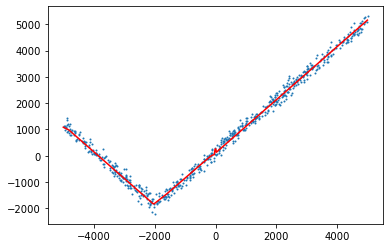

In [37]:
from matplotlib import pyplot
pyplot.plot(line_x, line_y, 'r')
pyplot.scatter(x,y,s=1)
pyplot.show()

In [39]:
predictor.delete_endpoint()

Gracefully stopping... (press Ctrl+C again to force)
